# Regresión Logística: Predicción de Enfermedad Coronaria

A continuación se observa un problema de clasificación binaria y se desea analizar una posible solución a partir de un modelo de regresión logística. Se busca implementar el algoritmo mencionado, inicialmente empleando la librería SciKit-Learn para luego desarrollar el mismo proceso de entrenamiento manualmente (Descenso de Gradiente Estocástico).

También se introducirán algunos conceptos para lidiar con datos desbalanceados como: matriz de confusión, curva ROC, y algunas otras métricas importantes.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **20 de septiembre** y se realizará a través de Bloque Neón.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.mlab as mlab
from numpy import random
import math
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
heart_df=pd.read_csv("heartDisease/framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
print(f'Se tienen {len(heart_df)} datos.')

Se tienen 3749 datos.


### Análisis de Distribución de Clases

En el diagrama a continuación puede observar un claro desbalanceo de los datos, en pasos posteriores hablaremos al respecto.

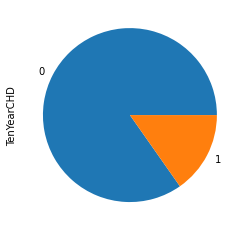

In [ ]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')

## Descripción de Variables

Cada atributo es un factor potencial de riesgo. Existen factores demográficos, conductuales y médicos.

- Demográfico:

    - male: masculino (1) o femenino (0); (Nominal)

    - age: edad del paciente; (Continuo: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

- Comportacional:

    - currentSmoker: si el paciente es o no fumador actual (nominal)

    - cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que uno puede tener cualquier cantidad de cigarrillos, incluso medio cigarrillo).

- Historia médica:

    - BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

    - prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

    - prevalentHyp: si el paciente era hipertenso (nominal)

    - diabetes: si el paciente tenía diabetes o no (nominal)

- Estado Médico actual:

    - totChol: nivel de colesterol total (continuo)

    - sysBP: presión arterial sistólica (continua)

    - diaBP: presión arterial diastólica (continua)

    - IMC: índice de masa corporal (continuo)

    - heartRate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

    - glucose: nivel de glucosa (continuo)

- **Variable a Predecir**

    - TenYearCHD: Riesgo de padecer enfermedad coronaria 10 años en el futuro (binario: "1", significa "Sí", "0" significa "No")

In [ ]:
x = heart_df.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
heart_df_scaled = pd.DataFrame(x_scaled, columns=heart_df.columns) # Conversión a un DataFrame #

In [ ]:
x = heart_df_scaled.iloc[:,:-1]
y = heart_df_scaled.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

## Parte 1

A continuación, debe utilizar la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística y calcular su precisión a partir de la función `accuracy_score`.

Obtenga resultados sobre los datos de entrenamiento y los datos de prueba. Concluya al respecto.

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression() # Modelo de Regresión Logística #
clf= logreg.fit(x_train, y_train) # Entrenamiento sobre los Datos #
y_pred = clf.predict(x_test) # Predicción de Etiquetas #
score = accuracy_score(y_test,y_pred)
print(f'Precisión inicial: {round(score,3)}')


Precisión inicial: 0.845



Se usó la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística, el cual es un clasificador, donde es posible elegir en sus parametros el solver o algoritmo a usar en el modelo, así como la posibilidad de asociar pesos a las clases para clases desbalanceadas, así mismo, la posiblidad de configurar un numero de iteraciones, regularizaciones y penalizaciones. Usando la función por defecto, la presición inicial es de 0.845, lo cual puede concluir que el modelo si predice regularmente los pacientes con enfermedad coronaria.

### Matriz de Confusión

Como recordará, la información en este dataset no posee una distribución de clases balanceada. La matriz de confusión es una herramienta que permite analizar el comportamiento del modelo para estos datos.

Puede encontrar más información en este artículo: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62).

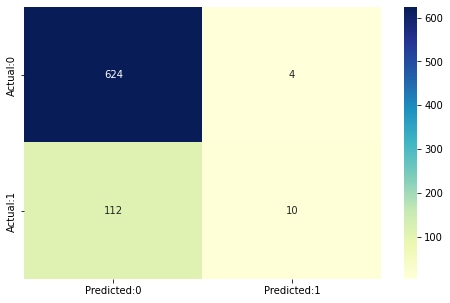

In [ ]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp ) 

624 4 112 10


En la matriz de confusión extraida del modelo reciente se puede observar que el modelo predice correctamente los datos negativos, ya que predice correctamente 624 pacientes que no están enfermos, y sólo se equivoca en 4 pacientes que no estaban enfermos y los estimó que sí. En cambio, se observa que en cuanto a los verdaderos positivos si posee un importante error, ya que estima erróneamente que 112 pacientes no padecen una enfermedad coronaria pero que sí son propensos a estar enfermos, y tan solamente estima correctamente 10 pacientes enfermos. 

### Tratamiento de Datos Desbalanceados

En casos de estudio como identificación de tendencias patológicas, es común tener datos desbalanceados, o en los cuales la gravedad de cometer [errores tipo I o tipo II](https://www.simplypsychology.org/type_I_and_type_II_errors.html) son bastante diferentes. En muchos casos, se puede preferir cometer cierto tipo de error sobre el otro. Para trabajar con estos problemas, se suele preferir sacrificar algo de [precisión](https://developers.google.com/machine-learning/crash-course/classification/accuracy) del modelo, a cambio de una mejora en términos prácticos.

Este proceso se realiza a partir de la modificación del umbral a partir del cual se decide si un dato pertenece a una clase u otra. Utilice la función `binarize` para obtener valores de `0` ó `1` según las probabilidades de las predicciones realizadas utilizando la función `model.predict_proba`.

Algunas métricas utilizadas para interpretar el rendimiento del modelo son las siguientes:

- F1Score
- TP Rate / Recall / Sensitividad
- TN Rate / Especificidad

Puede encontrar más información sobre estas métricas en los artículos:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)

In [ ]:
from sklearn.preprocessing import binarize
from sklearn import preprocessing
umbrales = [0,0.1, 0.155, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6, 0.6, 0.8, 0.9] # Vector que Contiene los Umbrales a Analizar # Valores enter 0 y 1

for umbral in umbrales:
    cm2 = 0
    # 
    y_pred_prob_yes =  clf.predict_proba(x_test)# Si usamos la funcion [:,1] para este caso, se tendran problemas en la func binarize().
    y_ayuda = clf.predict_proba(x_test)[:,1] # Para esto se crea una variable que en efecto, calcule la probabilidad de que sea clase 1
    y_pred2 = binarize(y_pred_prob_yes,threshold=umbral)[:,1] # Utilice la función binarize para convertir las probabilidades a clases 0 y 1 #
    cm2 = confusion_matrix(y_test,y_pred2)
    sen = round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)
    esp = round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)
    f1 = (2*sen*esp)/(sen+esp)
    print(f'''->Para un umbral de {round(umbral,4)} tenemos esta matriz de confusión:
{cm2}
Con {cm2[0,0]+cm2[1,1]} predicciones correctas y {cm2[1,0]} falsos negativos.
Sensitividad: {sen} Especificidad: {esp} F1: {f1}\n''')



->Para un umbral de 0 tenemos esta matriz de confusión:
[[  0 628]
 [  0 122]]
Con 122 predicciones correctas y 0 falsos negativos.
Sensitividad: 1.0 Especificidad: 0.0 F1: 0.0

->Para un umbral de 0.1 tenemos esta matriz de confusión:
[[296 332]
 [ 20 102]]
Con 398 predicciones correctas y 20 falsos negativos.
Sensitividad: 0.8361 Especificidad: 0.4713 F1: 0.6028054612207435

->Para un umbral de 0.155 tenemos esta matriz de confusión:
[[424 204]
 [ 40  82]]
Con 506 predicciones correctas y 40 falsos negativos.
Sensitividad: 0.6721 Especificidad: 0.6752 F1: 0.6736464336079566

->Para un umbral de 0.2 tenemos esta matriz de confusión:
[[499 129]
 [ 55  67]]
Con 566 predicciones correctas y 55 falsos negativos.
Sensitividad: 0.5492 Especificidad: 0.7946 F1: 0.6494929602619438

->Para un umbral de 0.3 tenemos esta matriz de confusión:
[[582  46]
 [ 87  35]]
Con 617 predicciones correctas y 87 falsos negativos.
Sensitividad: 0.2869 Especificidad: 0.9268 F1: 0.438162511328994

->Para un umb

En este caso de estudio, se modificó el umbral que decide si un dato pertenece a una clase o a otra, para poder cambiar el rendimiento del modelo bajo diferentes parámetros, como lo son la sensitividad, la especificidad, o ambas combinadas (F1 score). 

Este proceso se realizó usando la función `binarize` para obtener valores de `0` ó `1` según las probabilidades (predict_proba) de que se clasifique como un paciente propenso a la enfermedad.
Ahora, si se identifica la tendencia patológica de una enfermedad coronaria, hay que tener en cuenta que es preferible identificar todos los pacientes propensos, ya que son los que están en peligro de muerte; mientras que se aceptan casos en donde no estaban enfermos pero fueron diagnosticados así, por lo que es mejor disminuir la especificidad para obtener sensitividad en la predicción del modelo.

Pero para manejar un equilibrio en los pacientes diagnosticados, y no sencillamente predecir que todos son propensos, es prudente sacrificar un poco la sensitividad para obtener especificidad en la predicción del modelo. El rendimiento que describe realiza una adecuada compensación, es F1 score, el cual busca un equilibrio entre sensitividad y especificidad. El mejor umbral encontrado para obetener un alto F1, fue de 0.155, con el que se obtienen 506 predicciones correctas y 40 falsos negativos. Lo que se traduce en una 
sensitividad de 0.6721 y una especificidad de 0.6752, lo que significa un rendimiento general F1 de 0.67, valor similar que se obtiene si se evalua la precisión del modelo original eligiendo clases balanceadas dentro de los parámetros de la función de regresión logística:


In [ ]:
logregf = LogisticRegression(class_weight='balanced',max_iter=1000) # Modelo de Regresión Logística #
clff= logregf.fit(x_train, y_train) # Entrenamiento sobre los Datos #
y_predf = clff.predict(x_test) # Predicción de Etiquetas #
scoref = accuracy_score(y_test,y_predf)
print(f'Precisión final: {round(scoref,3)}')


Precisión final: 0.669


In [ ]:
print(np.shape(y_ayuda),np.shape(y_test),np.shape(y_pred_prob_yes)) # Se verifican los tamanos de las array

(750,) (750,) (750, 2)


Por otra parte, un criterio que facilita el visualizar este trade-off se conoce como la Curva ROC, en donde se ubican múltiples puntos para distintos valores del umbral de clasificación. Puede leer el artículo a continuación para una explicación más detallada:
- Curva ROC: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

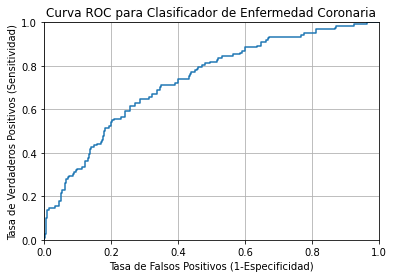

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_ayuda) # En este caso, se utiliza la func que calcula la prob de que sea de clase 1. 
# Se verifica con los tamanos de las outputs, teniendo en cuenta el tamano de y_test
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para Clasificador de Enfermedad Coronaria')
plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
plt.grid(True)

Observe la gráfica, y teniendo en cuenta los resultados concluya sobre la proporción que se puede considerar más adecuada en este contexto.

Teniendo en cuenta el análisis desarrollado con los diferentes umbrales, y la curva ROC bajo diferentes umbrales de clasificación, se concluye que la proporción más adecuada es que haya una sensitividad alrededor de 0.8 y una especificidad aproximada de 0.5, con el objetivo de predecir en su mayoría los pacientes propensos a sufrir dicha enfermedad para comenzar con su tratamiento, pero con un sacrificio de estimar pacientes que no estan propensos. 

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico para un modelo de regresión logística. Realice el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista errores se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

Teniendo en cuenta que:

$h_w(x) = \sigma(w^Tx) = \frac{1}{1 + e^{-w^Tx}}$

\\

Se procede a completar la iteracion de descenso de gradiente, vista en el taller uno, tal como:

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=20) # Se prepara la base
# De datos con los porcetanjes propuestos
np.random.seed(22) # Se altera la funcion random
X_train_array = np.c_[np.ones(x_train.values.shape[0]), x_train.values]
y_train_array = y_train.values
# Se extraen los valores de la base de datos necesarios, de forma aleatoria.

# Se definen los valores de error y epsilon, que funcionaran en el metodo como una medida de parada.
# Estas se definen para ecnontrar un modelo optimo teniendo en cuenta un uso computacional prudente.
eps = 1e-5
error = 100

# Se definen los valores aleatorias que se usaran para extraer del arreglo de valores definidos como
# de entrenamineto del modelo.

i = random.randint(X_train_array.shape[0]-1)
xActual = X_train_array[i]
yActual = y_train_array[i]


# Segun lo visto en clase se define la funcion sigma
def sigma(w,x):
    res_sigmoid = 1/(1 + math.exp(-(np.transpose(w).dot(x))))# Salida de la función sigmoide #
    return res_sigmoid


# Defina un vector que contenga las tasas que desea probar
#tasas =[0.01,0.02,0.05,0.1,0.4,1,2,10,20,100]
tasas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# Se proponen dos vectores de tasas, con el fin de 
# Observar diferencias en las simulaciones. Se usa el mas conveniente


# Teniendo en cuenta que se usaran diferentes tasas en ese proceso, es importante seleccionar la mejor de todas.
mejtasa=0
mejpred=0
mejypred=0


# Se contabiliza el numero de simulaciones
Loops = 0
num = 1 

# Para este descenso de gradiente, se utilizaron diferentes opciones el proceso, con el fin de encontrar un model mas optimo:


for tasa in tasas:
     w0 = np.random.rand(X_train_array.shape[1]) # Se escoge un vector aleatorio de parametros w inicial
     w = w0.copy() # Se actualiza w0 (Anterior) con w (Actual) Para las distintas tasas de apredizaje
     error = 100   # Se inicializa
     while error>eps:         # Criterio de parada 1 #
     # 1. ------------------------------------------------------------------------------------------------------
        for j in range (0, 2000):  # Criterio de parada 2 #
          # # Desarrollo de algoritmo # #
          w0 = w.copy() # Se actualiza w0 (Anterior) con w (Actual) para cada paso del descenso
          g = sigma(w0, xActual)  # A diferencia del taller 1, el g se establece con la funcion sigma
          error = g - yActual # Se actualiza el error para el criterio de parada
          w = w0 - tasa*error*xActual # Se actualiza el nuevo vector de parametros

          # Nueva seleccion de valores aleatorias de entrenamiento
          i = random.randint(X_train_array.shape[0]-1)
          xActual = X_train_array[i]
          yActual = y_train_array[i]

          # Se contabilizan las iteraciones dentro del proceso de descenso
          Loops += 1

     # 2. ------------------------------------------------------------------------------------------------------           
     X_test_array = np.c_[np.ones(x_test.values.shape[0]), x_test.values]
     y_test_array = y_test.values

     y_pred = np.zeros(len(x_test))

     for i in range(0,len(x_test)):
            prob = sigma(w,X_test_array[i])
            if prob>0.5:
              y_pred[i] = 1
            else:
              y_pred[i] = 0
     presactual = sklearn.metrics.accuracy_score(y_test,y_pred)
     print('Precisión del modelo con tasa', tasa, 'es' , presactual)
     num += 1
     if presactual > mejpred:
        mejpred =presactual
        mejtasa =tasa
        mejypred=y_pred
# 3. ------------------------------------------------------------------------------------------------------
print(f'Precisión mejor modelo actual: {mejpred}')
print(f'Mejor Tasa: {mejtasa}')
print('Numero de iteraciones con ultima tasa fue:', Loops)



Precisión del modelo con tasa 0.1 es 0.8413333333333334
Precisión del modelo con tasa 0.2 es 0.82
Precisión del modelo con tasa 0.3 es 0.788
Precisión del modelo con tasa 0.4 es 0.7386666666666667
Precisión del modelo con tasa 0.5 es 0.8373333333333334
Precisión del modelo con tasa 0.6 es 0.7266666666666667
Precisión del modelo con tasa 0.7 es 0.8146666666666667
Precisión del modelo con tasa 0.8 es 0.848
Precisión del modelo con tasa 0.9 es 0.744
Precisión mejor modelo actual: 0.848
Mejor Tasa: 0.8
Numero de iteraciones con ultima tasa fue: 94000


## Matriz de Confusión

Observe y analice la matriz de confusión para su mejor modelo. Escriba claramente sus conclusiones.

Teniendo en cuenta que la matriz de confusion puede tomar diferentes estructuras dependiendo de la refrencia e iterprectacion de los datos, se hace un bosquejo general del orden de los valores producidos especificamente por la funcion  confusion_matrix() de python. En este, la primera letra hace referencia a si el modelo diagnostico como verdadero o falso la enfermedad, y la segunda a que si efectivamente el paciente tenia la enfermedad (Positivo) o no (Negativo) 



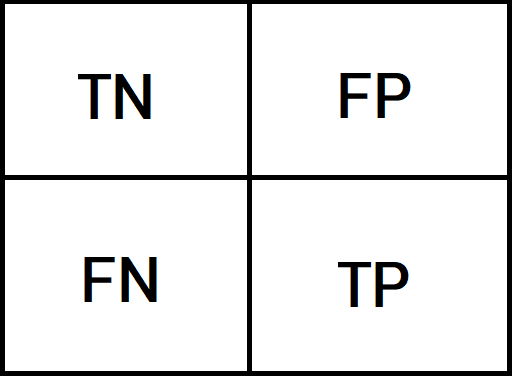

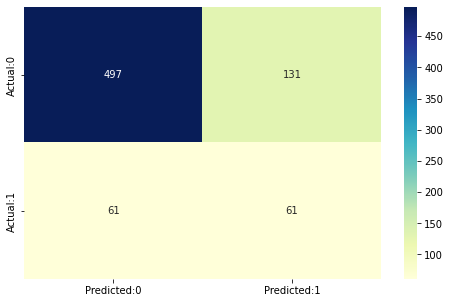

In [ ]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp ) 

497 131 61 61


Como se observa, el modelo  tiene mas ruido que el modelo visto en la primera parte. Sin embargo, se sigue dando prioridad a los diagnosticos Verdaderos Negativos, pues teniendo en cuenta la gravedad de la enfermedad, un Diagnostico Falso Positivo, es correr el riesgo que ese grupo muera en su totalidad, es decir, tratar de disminuir su valor al maximo.